<a href="https://colab.research.google.com/github/newbiepawel/Hello-Github/blob/master/UPC_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bikes.csv to bikes.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bikes.csv']), sep =';')

In [4]:
df.head()

,Unnamed: 0,date,bikes
0,1,02.01.2019,123
1,2,03.01.2019,195
2,3,04.01.2019,202
3,4,05.01.2019,75
4,5,07.01.2019,178


a) 1 Posortuj dane po dacie

In [5]:
df.sort_values(by='date', ascending=True)

,Unnamed: 0,date,bikes
29,30,01.02.2019,203
57,58,01.03.2019,156
88,89,01.04.2019,269
145,146,01.06.2019,395
173,174,01.07.2019,252
...,...,...,...
144,145,31.05.2019,423
203,204,31.07.2019,548
232,233,31.08.2019,143
292,293,31.10.2019,186


a) 2. Stwórz nowe kolumny:
 Dzień tygodnia
 Miesiąc
 Pora roku
 Kwartał
 Niedziele handlowe


In [6]:
df['Date'] = pd.to_datetime(df['date'])

In [7]:
df['day'] = df['Date'].dt.dayofweek
df['month'] = pd.DatetimeIndex(df['Date']).month

In [8]:
dictionary = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day'] = df['day'].map(dictionary)      

In [9]:
df.head()

,Unnamed: 0,date,bikes,Date,day,month
0,1,02.01.2019,123,2019-02-01,Friday,2
1,2,03.01.2019,195,2019-03-01,Friday,3
2,3,04.01.2019,202,2019-04-01,Monday,4
3,4,05.01.2019,75,2019-05-01,Wednesday,5
4,5,07.01.2019,178,2019-07-01,Monday,7


In [199]:
df['quarter'] = df['Date'].dt.quarter

In [105]:
df.head()

,Unnamed: 0,date,bikes,Date,day,month,quarter
0,1,02.01.2019,123,2019-02-01,Friday,2,1
1,2,03.01.2019,195,2019-03-01,Friday,3,1
2,3,04.01.2019,202,2019-04-01,Monday,4,2
3,4,05.01.2019,75,2019-05-01,Wednesday,5,2
4,5,07.01.2019,178,2019-07-01,Monday,7,3


In [420]:
season = []
for i in range(0, len(df['month'])):
  if (df['month'][i] == 12 & int(df['date'][i][0:2]) >= 22) or df['month'][i] == 1 or df['month'][i] == 2 or (df['month'][i] == 3 & int(df['date'][i][0:2])<= 22):
    season.append('winter')
  elif (df['month'][i] == 3 & int(df['date'][i][0:2]) >= 23) or df['month'][i] == 4 or df['month'][i] == 5 or (df['month'][i] == 6 & int(df['date'][i][0:2])<= 22):
    season.append('spring')
  elif (df['month'][i] == 6 & int(df['date'][i][0:2]) >= 23) or df['month'][i] == 7 or df['month'][i] == 8 or (df['month'][i] == 9 & int(df['date'][i][0:2]) <= 22):
     season.append('summer')
  else:
    season.append('autumn')

In [201]:
df['season'] = season

In [118]:
df.head()

,Unnamed: 0,date,bikes,Date,day,month,quarter,season
0,1,02.01.2019,123,2019-02-01,Friday,2,1,winter
1,2,03.01.2019,195,2019-03-01,Friday,3,1,winter
2,3,04.01.2019,202,2019-04-01,Monday,4,2,spring
3,4,05.01.2019,75,2019-05-01,Wednesday,5,2,spring
4,5,07.01.2019,178,2019-07-01,Monday,7,3,summer


In [424]:
# Niedziela handlowa jako pierwsza niedziela miesiąca
z = []
for i in range(0, len(df)):
  if (int(df['date'][i][0:2]) <=7) & (df['day'][i] == 'Sunday'):
    z.append(1)
  else:
    z.append(0)  

In [426]:
df['handlowa'] = z

In [427]:
df.head()

,Unnamed: 0,date,bikes,Date,day,month,quarter,season,hadlowa,handlowa
0,1,02.01.2019,123,2019-02-01,Friday,2,1,winter,1,0
1,2,03.01.2019,195,2019-03-01,Friday,3,1,winter,1,0
2,3,04.01.2019,202,2019-04-01,Monday,4,2,spring,1,0
3,4,05.01.2019,75,2019-05-01,Wednesday,5,2,spring,1,0
4,5,07.01.2019,178,2019-07-01,Monday,7,3,summer,1,0


3. Oblicz średnią sprzedaż rowerów na dzień tygodnia, porę roku, miesiąc i przedstaw te
wartości w formie graficznej. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

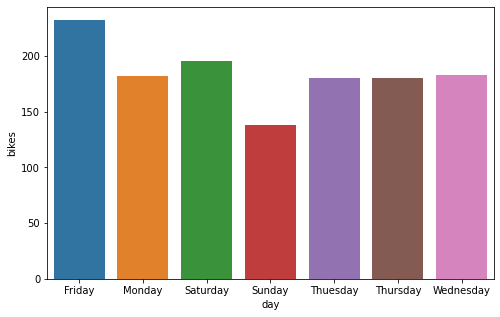

In [148]:
df_2 = df.groupby('day').mean()
df_2.reset_index(inplace=True)
plt.figure(figsize = (8,5))
sns.barplot(x='day', y='bikes', data=df_2);

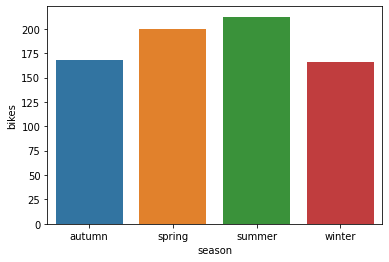

In [143]:
df_3 = df.groupby('season').mean()
df_3.reset_index(inplace=True)
sns.barplot(x='season', y='bikes', data=df_3);

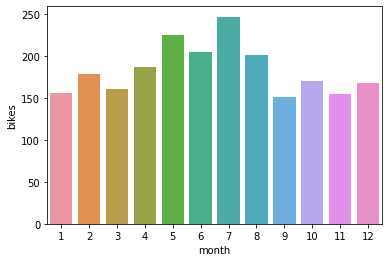

In [144]:
df_4 = df.groupby('month').mean()
df_4.reset_index(inplace=True)
sns.barplot(x='month', y='bikes', data=df_4);

4. Utwórz histogram sprzedaży rowerów zależny od dnia tygodnia i zinterpretuj uzyskane
wyniki.

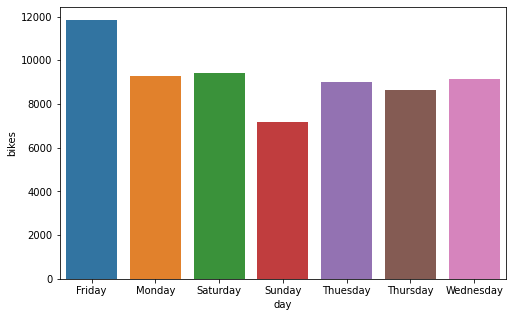

In [147]:
# Interpretując ponizszy histogram najwięcej rowerów sprzedaje się w piątek zaś najmniej w niedziele

df_5 = df.groupby('day').sum()
df_5.reset_index(inplace=True)
plt.figure(figsize = (8,5))
sns.barplot(x='day', y='bikes', data=df_5);

5. Stwórz wykres szeregu czasowego i zaznacz osobnym kolorem 5 dni z największą liczbą
sprzedaży. 

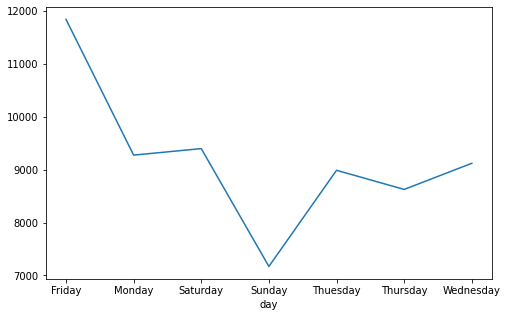

In [152]:
plt.figure(figsize = (8,5))
df.groupby('day').sum()['bikes'].plot();

6. Jakie inne zmienne mogłyby pomóc w prognozowaniu sprzedaży rowerów?

In [ ]:
#lokalizacja
#ilość ścieżek w okolicy
#liczba dzieci mieszkających w okolicy
#cena
#cena i dostęp do alternatyw jak np. hulajnoga elektryczna

b) Anagramy:
Anagram to słowo powstałe przez przestawienie liter drugiego słowa, składające się dokładnie
z tych samych liter co drugie słowo. Przykładem anagramu dla słowa arbuz jest słowo burza.
Napisz program, który na wejściu przyjmuje dwa napisy oddzielone znakiem nowej linii, a
następnie zdecyduje czy napisy są anagramami (wypisując 1 jeżeli są lub 0 jeżeli nimi nie są).
Dwa puste napisy są swoimi anagramami.

In [192]:
def if_anagram(word):
    if '\n' not in word:
        print('podaj dwa wyrazy odzielone znakiem \n')
    else:    
          

        d = word.split('\n')
        x = d[0]
        y = d[1]
    # the sorted strings are checked  
        if(sorted(x) == sorted(y)): 
            return(1)  
        else: 
            return(0)         